In [1]:
import matplotlib as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier


df=pd.read_csv('C:\\Machine_Learning_Assignment\\train_val_img.csv')

X=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [21]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
# Λίστα τιμών για την παράμετρο C
K_values = [3, 5, 7, 9, 11, 13, 15, 17, 19]  

k = 5
cv = KFold(n_splits=k, shuffle=True, random_state=42) #Ορισμός του KFold validation

f1=[]
var=[]

# Ορισμός των στρατηγικών υπερδειγματοληψίας και υποδειγματοληψίας
over_sampling_strategy = {'Tram': 3500, 'Cyclist': 3500}
under_sampling_strategy = {'Car': 3500}

# Εκπαίδευση KNN για κάθε τιμή του K
for K in K_values:
    # Φτιάχνουμε ένα Pipeline που πρώτα κάνει scaling και μετά καλεί τον SVC
    model = ImbPipeline([
        ("scaler", StandardScaler()),
        ("smote", SMOTE(sampling_strategy=over_sampling_strategy, random_state=42)),
        ("under", RandomUnderSampler(sampling_strategy=under_sampling_strategy, random_state=42)),
        ("pca", PCA(n_components=300)),
        ("knn", KNeighborsClassifier(n_neighbors=K, metric='euclidean'))
    ])
    scores = cross_val_score(model, X, y, cv=cv, scoring='f1_macro') #Εκπαίδευση του μοντέλου για τα 5 διαφορετικά folds των train και test data
    mean_score = np.mean(scores) #Υπολογισμός των μέσων όρων του accuracy
    var_score = np.var(scores) #Υπολογισμός της διακύμανσης
    f1.append(mean_score)
    var.append(var_score)

In [23]:
# Εκτύπωση αποτελεσμάτων
print("K\tMean Macro F1\tVariance")
for i, K in enumerate(K_values):
    print(f"{K}\t{f1[i]:.3f}\t\t{var[i]:.6f}")

C	Mean Macro F1	Variance
3	0.786		0.000159
5	0.755		0.000065
7	0.726		0.000058
9	0.707		0.000083
11	0.690		0.000078
13	0.677		0.000052
15	0.666		0.000061
17	0.656		0.000037
19	0.648		0.000012


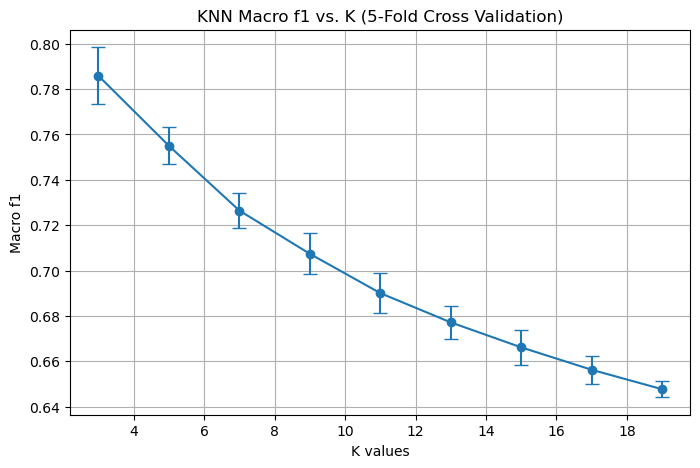

In [27]:
import matplotlib.pyplot as plt
# plot των αποτελεσμάτων για κάθε K
plt.figure(figsize=(8, 5))
plt.errorbar(K_values, f1, yerr=np.sqrt(var), fmt='-o', capsize=5)
plt.title("KNN Macro f1 vs. K (5-Fold Cross Validation)")
plt.xlabel("K values")
plt.ylabel("Macro f1")
plt.grid(True)
plt.show()

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Λίστα τιμών για την παράμετρο K
K_values = [3, 5, 7, 9, 11, 13, 15, 17, 19]  

k = 5
cv = KFold(n_splits=k, shuffle=True, random_state=42) #Ορισμός του KFold validation

f1=[]
var=[]

# Εκπαίδευση KNN για κάθε τιμή του K
for K in K_values:
    # Φτιάχνουμε ένα Pipeline που πρώτα κάνει scaling και μετά καλεί τον SVC
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=300)),
        ("knn", KNeighborsClassifier(n_neighbors=K, metric='euclidean'))
    ])
    scores = cross_val_score(model, X, y, cv=cv, scoring='f1_macro') #Εκπαίδευση του μοντέλου για τα 5 διαφορετικά folds των train και test data
    mean_score = np.mean(scores) #Υπολογισμός των μέσων όρων του Macro f1
    var_score = np.var(scores) #Υπολογισμός της διακύμανσης
    f1.append(mean_score)
    var.append(var_score)

In [39]:
# Εκτύπωση αποτελεσμάτων
print("K\tMean Macro F1\tVariance")
for i, K in enumerate(K_values):
    print(f"{K}\t{f1[i]:.3f}\t\t{var[i]:.6f}")

K	Mean Macro F1	Variance
3	0.952		0.000007
5	0.947		0.000003
7	0.944		0.000029
9	0.939		0.000010
11	0.937		0.000010
13	0.933		0.000014
15	0.927		0.000008
17	0.922		0.000000
19	0.918		0.000018


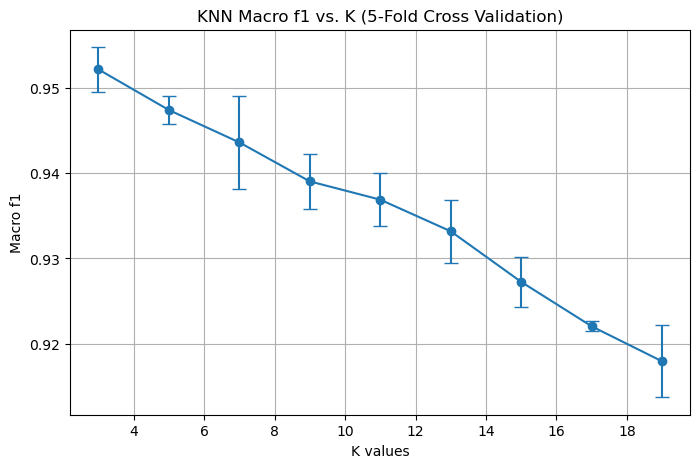

In [37]:
# plot των αποτελεσμάτων για κάθε K
plt.figure(figsize=(8, 5))
plt.errorbar(K_values, f1, yerr=np.sqrt(var), fmt='-o', capsize=5)
plt.title("KNN Macro f1 vs. K (5-Fold Cross Validation)")
plt.xlabel("K values")
plt.ylabel("Macro f1")
plt.grid(True)
plt.show()

In [59]:
# Εκπαίδευση του τελικού μοντέλου με το καλύτερο K σε όλο το Training+Validation σετ
final_model = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=300)),
    ("knn", KNeighborsClassifier(n_neighbors=3, metric='euclidean'))
])

final_model.fit(X, y)

# Φόρτωση testing dataset
df=pd.read_csv('C:\\Machine_Learning_Assignment\\testing_img.csv')

X_test=df.iloc[:,:-1]
y_test=df.iloc[:,-1]

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
# Αξιολόγηση στο Testing σετ
y_pred = final_model.predict(X_test)
print("\nClassification Report στο Testing σετ:")
print(classification_report(y_test, y_pred))


Classification Report στο Testing σετ:
              precision    recall  f1-score   support

         Car       1.00      0.99      1.00      3890
     Cyclist       0.89      0.91      0.90       241
  Pedestrian       0.96      0.97      0.96       734
        Tram       0.97      1.00      0.98        58

    accuracy                           0.99      4923
   macro avg       0.95      0.97      0.96      4923
weighted avg       0.99      0.99      0.99      4923



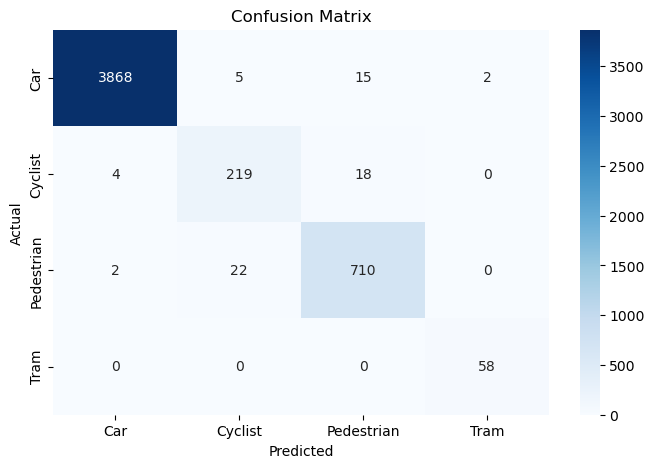

Macro F1-score στο Testing σετ: 0.9601


In [63]:
import seaborn as sns

# Δημιουργία Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y)  # Λήψη των ονομάτων των κλάσεων

# Οπτικοποίηση του Confusion Matrix
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Υπολογισμός Macro F1-score
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Macro F1-score στο Testing σετ: {macro_f1:.4f}")

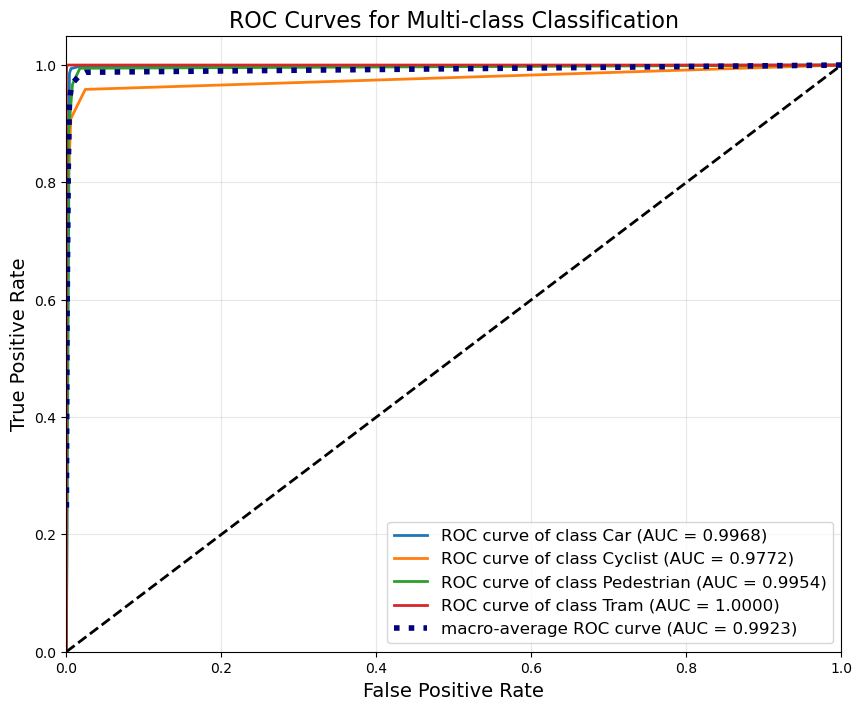

In [65]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Δημιουργία ROC Curves

# Binarize the output labels for ROC
y_test_binarized = label_binarize(y_test, classes=classes)
n_classes = y_test_binarized.shape[1]

# Λήψη των scores από το μοντέλο
y_score = final_model.predict_proba(X_test)

# Υπολογισμός ROC curve και AUC για κάθε κλάση
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Υπολογισμός Macro ROC Curve
from sklearn.preprocessing import label_binarize

# Calculate macro-average ROC curve and ROC area
# Aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

# Plot ROC curve for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (AUC = {1:0.4f})'
             ''.format(classes[i], roc_auc[i]))

# Plot macro-average ROC curve
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (AUC = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves for Multi-class Classification', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.show()